<a href="https://colab.research.google.com/github/isys5002-itp/isys5002-2023-semester2/blob/main/11_superheroes_business_report_using_GUI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Superheroes Business Report Notebook
This notebook is a **basic** example of how you could structure your Business report notebook for your assignment.

**Overview**

Superheroes, as iconic figures in popular culture, present a compelling area for exploration. We seek to investigate the interplay between superheroes' gender and alignment, aiming to uncover potential gender-related patterns in their characterization as "Good" or "Evil." This analysis is driven by the need to better understand how diverse identities are represented in the superhero genre and the broader implications for societal perceptions.

**Problem solving methodology**
1. State the problem clearly
2. Describe the input and output information
3. Work the problem by hand
4. Develop an algorithm
5. Convert algorithm/psedocode in to python code
6. Test solution with a variety of data

## Problem statement
Superheroes, as iconic figures in popular culture, present a compelling area for exploration. We seek to investigate the interplay between superheroes' gender and alignment, aiming to uncover potential gender-related patterns in their characterization as "Good" or "Evil." This analysis is driven by the need to better understand how diverse identities are represented in the superhero genre and the broader implications for societal perceptions.

This analysis aims to determine whether there are discernible connections between the gender of superheroes and their alignment as "Good" or "Evil." By collecting and analyzing dataset provided, we will investigate whether particular genders are more frequently associated with being "Good" or "Evil" superheroes. This exploration will provide insights into representation within the superhero genre, offering valuable contributions to media and gender studies.

## Inputs and Outputs Analysis

### Inputs for Analysis:
Superheroes dataset as SQLite database


### Outputs:

#### Data Analysis 1: Exploring the superheros by gender and alignment.
* a) Analysing the distribution of superheroes based on their gender
* b) Analysing the distribution of superheroes based on their alignment

#### Data Analysis 2: Exploring the relationship between gender and alignment among superheroes.

* a) Superhero Alignment Distribution by Gender Analysis
* b) Analysing the superheroes gender distribution by Alignment

## Example Data and Analysis (Work the problem by Hand)

id | last_name | first_name | superhero      | gender | alignment
---|-----------|------------|----------------|--------|-----------
0  | 14        | Quinzel    | Harley         | Female | Evil
1  | 15        | Kyle       | Selina         | Female | Evil
2  | 16        | Darkholme  | Mystique       | Female | Unknown
3  | 18        | Ivy        | Poison         | Female | Evil
4  | 19        | Moone      | Enchantress    | Female | Evil


Based on the sample data above,
* All females with all Evil alignment
* All Evil superheores are females




## Design - Algorithm


**!!! Example Only - can be expended with details !!!**

**Refer to the Calculator program**

1. Create connection to the SQLite database.
2. Loads the 'superheroes' table into a Pandas DataFrame.
3. Performs data exploration, including displaying the first few rows, checking for duplicates, and handling missing values.
4. Analysis 1: Exploring superheroes gender and alignment using bar charts and pie charts.
5. Analysis 2: Exploring the distribution of superheroes by gender and alignment using bar charts.
5. Closes the database connection.

**Final Design - pseudocode?**

Refer to the Calculator program

# Data Analysis Report

## Data Analysis 1: Exploring the superheros by gender and alignment.

### A. Analysing the distribution of superheroes based on their gender

In [8]:
# @title <i>Superheroes distribution by Gender</i>
import sqlite3
import pandas as pd

connection = sqlite3.connect('superheroes.db')
cursor = connection.cursor()


sql='''
SELECT * from superheroes;
'''
# Load the data into a DataFrame
df = pd.read_sql_query(sql, connection)

## analysis 1a ##
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the count of superheroes by gender
gender_counts = df['gender'].value_counts()

#gender_counts
print(f"Male: {gender_counts.Male}\nFemale: {gender_counts.Female}")




Male: 16
Female: 9


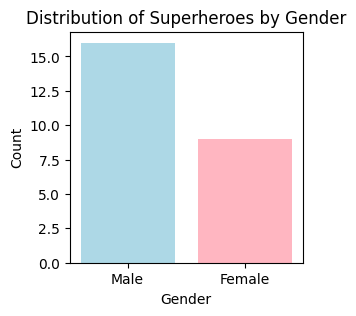

In [10]:
# @title <i>Superheroes distribution by Gender Visualisation</i>

# Create a bar chart to visualize the distribution
plt.figure(figsize=(3, 3))
plt.bar(gender_counts.index, gender_counts.values, color=['lightblue', 'lightpink', 'lightgray'])
plt.title('Distribution of Superheroes by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Display the plot
plt.show()


# Analysis Discussion - insights gained/observation

There are less female superheroes in the world. We need put in policies to encourage more participant of woemn in superheroes endevours.

### B. Analysing the distribution of superheroes based on their alignment


Good: 10	Evil: 15


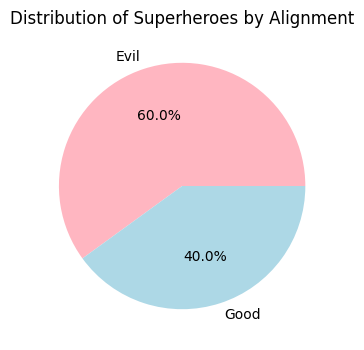

In [13]:
# @title Superheroes distribution by Alignment

# Calculate the count of superheroes by alignment
alignment_counts = df['alignment'].value_counts()

print(f"Good: {alignment_counts.Good}\tEvil: {alignment_counts.Evil}")

# Create a pie chart to visualize the distribution
plt.figure(figsize=(6, 4))
plt.pie(alignment_counts, labels = alignment_counts.index,autopct='%1.1f%%', colors=['lightpink', 'lightblue', 'lightgray'] )
plt.title('Distribution of Superheroes by Alignment')

# Display the plot
plt.show()


## Data Analysis 2: Exploring the  relationship between gender and alignment among superheroes.

We examine whether there are any gender-based patterns in superhero alignment.
We look for trends, such as whether a particular gender is more commonly associated with being "Good" or "Evil."

You have selected Option 2: by Alignment
gender     Female  Male
alignment              
Evil            5    10
Good            4     6


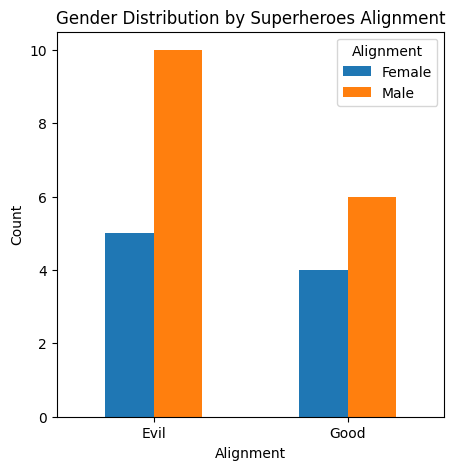

In [28]:
# @title Relationship between gender and alignment among superheroes.
option = "Option 2: by Alignment" # @param ["Option 1: by Gender", "Option 2: by Alignment"]


if option == "Option 2: by Alignment":
  print("You have selected Option 2: by Alignment")
  # Group the data by alignment and gender
  grouped_data = df.groupby(['alignment', 'gender']).size().unstack().fillna(0)
  print(grouped_data)

  # Create a grouped bar chart to visualize the distribution
  ax = grouped_data.plot(kind='bar', figsize=(5, 5))
  plt.title('Gender Distribution by Superheroes Alignment')
  plt.xlabel('Alignment')
  plt.ylabel('Count')
  plt.legend(title='Alignment', loc='upper right', labels=['Female', 'Male'])
  plt.xticks(rotation=0)

  # Display the plot
  plt.show()


elif option == "Option 1: by Gender":
  print("You have selected Option 1: by Gender")

  # Group the data by gender and alignment
  grouped_data = df.groupby(['gender', 'alignment'])
  # Calculate the count for each group
  gender_alignment_counts = grouped_data.size()
  # Reshape the result to have gender as rows and alignment as columns
  gender_alignment_counts = gender_alignment_counts.unstack()
  # Replace any missing values with zeros
  gender_alignment_counts = gender_alignment_counts.fillna(0)
  # Display the resulting DataFrame
  print(gender_alignment_counts)

  # Create a horizontal bar chart to visualize the distribution
  ax = gender_alignment_counts.plot(kind='barh', stacked=True, figsize=(5, 5))
  plt.title('Alignment Distribution by Gender')
  plt.xlabel('Count')
  plt.ylabel('Gender')
  plt.legend(title='Alignment', loc='upper right', labels=['Evil', 'Good'])

  # Display the plot
  plt.show()


# Analsis Discussion - insights gained

There are more eveil male superheroes. That could be attributed to the fact that we have less female superheores.

# Reference Sources:
https://colab.research.google.com/notebooks/forms.ipynb
